In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
#/content/drive/MyDrive/Car_body_detect_20_July

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 3.3 MB/s 
     |████████████████████████████████| 79 kB 4.8 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 151 kB 40.8 MB/s 
     |████████████████████████████████| 130 kB 65.0 MB/s 
     |████████████████████████████████| 843 kB 53.3 MB/s 
     |████████████████████████████████| 117 kB 73.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=064a4835bcaaee941d5e906af695e5d28ed553767d7a306d3dbb220e81cb6566
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=285b9abfbd88d721ace

In [ ]:
import torch
assert torch.__version__.startswith("1.8") 
import torchvision
import cv2
import os
import numpy as np
import json
import random
import matplotlib.pyplot as plt
%matplotlib inline

from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("carbody_train", {}, '/content/drive/MyDrive/aug15_car_detection/train.json', '/content/drive/MyDrive/aug15_car_detection/train' )

In [ ]:
sample_metadata = MetadataCatalog.get("carbody_train")
dataset_dicts = DatasetCatalog.get("carbody_train")

[08/15 11:45:26 d2.data.datasets.coco]: Loaded 717 images in COCO format from /content/drive/MyDrive/aug15_car_detection/train.json


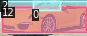

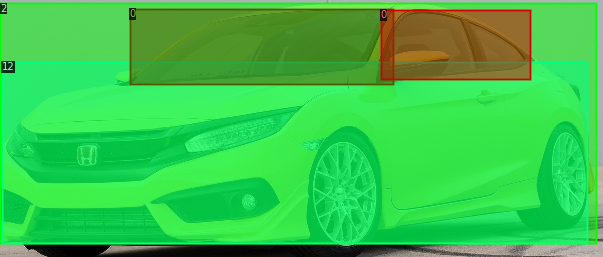

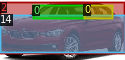

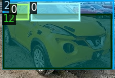

In [ ]:
import random 
for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d['file_name'])
    visulizer = Visualizer(img[:,:,::-1],  scale=0.5)
    vis = visulizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:,:,::-1])

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("carbody_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE =128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 18
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

######################trining starts ###############
trainer.train()


[08/15 11:52:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:03, 56.4MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[08/15 11:52:43 d2.engine.train_loop]: Starting training from iteration 0
[08/15 11:52:53 d2.utils.events]:  eta: 0:07:37  iter: 19  total_loss: 4.433  loss_cls: 2.918  loss_box_reg: 0.6621  loss_mask: 0.6898  loss_rpn_cls: 0.05129  loss_rpn_loc: 0.09365  time: 0.4619  data_time: 0.0331  lr: 4.9953e-06  max_mem: 2764M
[08/15 11:53:03 d2.utils.events]:  eta: 0:07:37  iter: 39  total_loss: 4.434  loss_cls: 2.785  loss_box_reg: 0.7722  loss_mask: 0.6824  loss_rpn_cls: 0.03978  loss_rpn_loc: 0.09439  time: 0.4702  data_time: 0.0059  lr: 9.9902e-06  max_mem: 2764M
[08/15 11:53:12 d2.utils.events]:  eta: 0:07:28  iter: 59  total_loss: 4.128  loss_cls: 2.507  loss_box_reg: 0.8197  loss_mask: 0.6677  loss_rpn_cls: 0.04378  loss_rpn_loc: 0.09291  time: 0.4743  data_time: 0.0059  lr: 1.4985e-05  max_mem: 2764M
[08/15 11:53:22 d2.utils.events]:  eta: 0:07:21  iter: 79  total_loss: 3.709  loss_cls: 2.068  loss_box_reg: 0.8047  loss_mask: 0.6448  loss_rpn_cls: 0.03656  loss_rpn_loc: 0.1127  time: 0

In [ ]:
cfg.MODEL.WEIGHTS=os.path.join(cfg.OUTPUT_DIR, 'model_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.5
cfg.DATASETS.TEST = ("carbody_train",)
predictor_train = DefaultPredictor(cfg)

## Result Visylizer

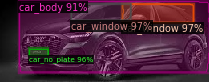

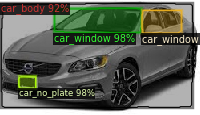

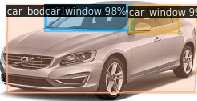

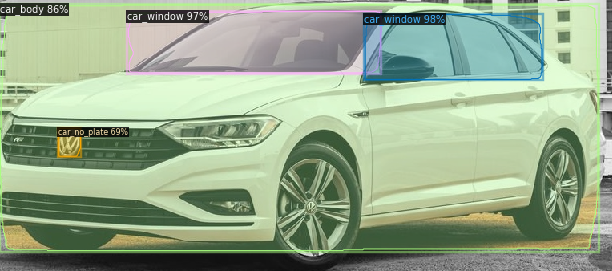

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):
    im = cv2.imread(d['file_name'])
    outputs = predictor_train(im)
    v = Visualizer(im[:,:,::-1],  
                   metadata = sample_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:,:,::-1])



## Evaluation on train data

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator_train = COCOEvaluator("carbody_train", ("bbox","segm"), False, output_dir="./output/" )
val_loader_train = build_detection_test_loader(cfg, "carbody_train")
print(inference_on_dataset(trainer.model, val_loader_train, evaluator_train ))
                           

[08/15 12:06:41 d2.data.datasets.coco]: Loaded 717 images in COCO format from /content/drive/MyDrive/aug15_car_detection/train.json
[08/15 12:06:41 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/15 12:06:41 d2.data.common]: Serializing 717 elements to byte tensors and concatenating them all ...
[08/15 12:06:41 d2.data.common]: Serialized dataset takes 0.55 MiB
[08/15 12:06:41 d2.evaluation.evaluator]: Start inference on 717 batches
[08/15 12:06:43 d2.evaluation.evaluator]: Inference done 11/717. Dataloading: 0.0014 s/iter. Inference: 0.1052 s/iter. Eval: 0.0070 s/iter. Total: 0.1135 s/iter. ETA=0:01:20
[08/15 12:06:48 d2.evaluation.evaluator]: Inference done 50/717. Dataloading: 0.0016 s/iter. Inference: 0.1148 s/iter. Eval: 0.0114 s/iter. Total: 0.1279 s/iter. ETA=0:01:25
[08/15 12:06:53 d2.evaluation.evaluator]: Inference done 86/717. Dataloading: 0.0018 s/iter. Inf

## Getting Custom_config file

In [ ]:
f = open('config.yml', 'w')
f.write(cfg.dump())
f.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Evaluation on Test data

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("carbody_test1", {}, '/content/drive/MyDrive/aug15_car_detection/test.json', '/content/drive/MyDrive/aug15_car_detection/test' )

In [ ]:
sample_metadata_test = MetadataCatalog.get("carbody_test1")
dataset_dicts_test = DatasetCatalog.get("carbody_test1")

[08/15 12:12:54 d2.data.datasets.coco]: Loaded 75 images in COCO format from /content/drive/MyDrive/aug15_car_detection/test.json


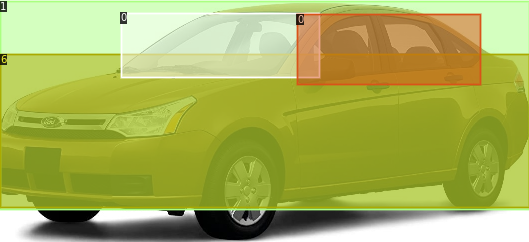

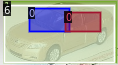

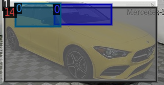

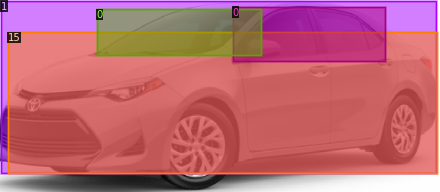

In [ ]:
import random 
for d in random.sample(dataset_dicts_test, 4):
    img = cv2.imread(d['file_name'])
    visulizer = Visualizer(img[:,:,::-1],  scale=0.5)
    vis = visulizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:,:,::-1])

## Testing on test data 

In [ ]:
cfg.MODEL.WEIGHTS=os.path.join(cfg.OUTPUT_DIR, 'model_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.5
cfg.DATASETS.TEST = ("carbody_test1",)
predictor_test = DefaultPredictor(cfg)

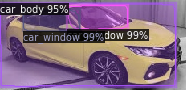

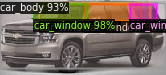

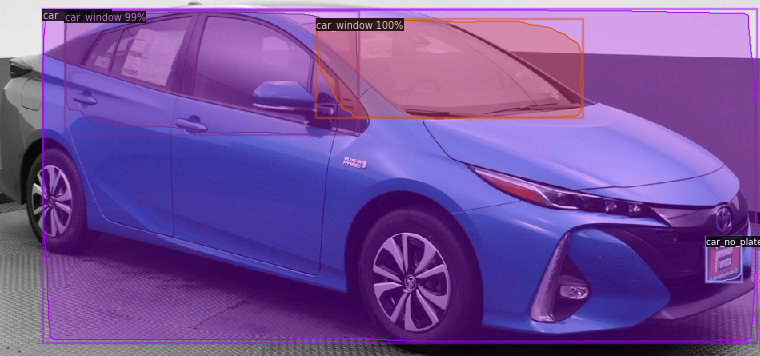

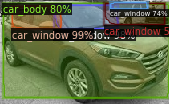

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts_test, 4):
    im = cv2.imread(d['file_name'])
    outputs = predictor_test(im)
    v = Visualizer(im[:,:,::-1],  
                   metadata = sample_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:,:,::-1])



In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator_test = COCOEvaluator("carbody_test1", ("bbox","segm"), False, output_dir="./output/" )
val_loader_test = build_detection_test_loader(cfg, "carbody_test1")
print(inference_on_dataset(trainer.model, val_loader_test, evaluator_test ))
                           

[08/15 12:15:44 d2.data.datasets.coco]: Loaded 75 images in COCO format from /content/drive/MyDrive/aug15_car_detection/test.json
[08/15 12:15:44 d2.data.build]: Distribution of instances among all 17 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|  car_window   | 138          |   car_body    | 75           | green_color.. | 4            |
| blue_color_.. | 5            | grey_color_.. | 5            | white_color.. | 5            |
| gold_color_.. | 6            | orange_colo.. | 5            | beige_color.. | 5            |
| brown_color.. | 5            | pink_color_.. | 5            | black_color.. | 5            |
| tan_color_car | 5            | red_color_car | 5            | yellow_colo.. | 5            |
| silver_colo.. | 5            | purple_colo.. | 5            |               |              |
|     total     | 288      

AssertionError: ignored